In [ ]:
#pip install netCDF4 numpy geopandas rasterio matplotlib

In [12]:
import geopandas as gpd
import rasterio
from rasterio.features import geometry_mask
import matplotlib.pyplot as plt
from shapely.geometry import box
import netCDF4 as nc
import numpy as np
import pandas as pd
from rasterio.transform import from_origin


In [4]:
#show information of the nc 
# Replace 'your_file.nc' with the path to your .nc file
file_path = r'D:/Hesham/CUAHSI/Geospatial/Datasets/Ponding_index/RouteLink_CONUS_v3.0.nc'

# Open the NetCDF file
ds = nc.Dataset(file_path, 'r')

# Print the file metadata
print(ds)

# List all variables
print(ds.variables.keys())

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Convention: CF-1.6
    featureType: timeSeries
    history: Created Thu Sep  9 18:11:34 2021
    processing_notes: This file was produced Thu Sep  9 16:16:38 2021 by Kevin Sampson (NCAR) and has the following attributes: 
   This file uses the NHDPlus v21 "flattened" geodatabase v03: NHDPlusV21_National_Flattened.gdb.
   This file includes only reaches in CONUS.
   Topology fixes using: Topology_Fixer.csv.
   NHDFlowlines removed using: Remove_COMIDs_NHDFLowline_Network.csv.
   Gage preference list: numberOf100QualityObs.2017-03-15.csv.
   Gage additions made using: Add_Gage_Association.csv.
   Gage-to-flowline association changes made using: Bad_Gage_Associations.csv.
   Tidal-influenced gages removed using: TidalGageList_20170316.csv.
   Waterbody associations performed using spatial join with reservoir feature class C:\Data\Projects\Gochis\NWM_v3_0\CONUS\Reservoirs\Input_Waterbodies_NWM

In [9]:
import netCDF4 as nc
import pandas as pd

# Replace 'your_file.nc' with the path to your .nc file
file_path = r'D:/Hesham/CUAHSI/Geospatial/Datasets/Ponding_index/RouteLink_CONUS_v3.0.nc'

# Open the NetCDF file
ds = nc.Dataset(file_path, 'r')

# Prepare a list to hold the metadata
data = []

# Collect metadata for each variable
for var_name in ds.variables.keys():
    var = ds.variables[var_name]
    var_data = {'Variable': var_name}
    for attr_name in var.ncattrs():
        var_data[attr_name] = getattr(var, attr_name)
    data.append(var_data)

# Convert the list to a DataFrame
df = pd.DataFrame(data)

df

# Save DataFrame to a CSV file for further use if needed
#output_csv_path = r'D:/Hesham/CUAHSI/Geospatial/Datasets/Ponding_index/variable_metadata.csv'
#df.to_csv(output_csv_path, index=False)




,Variable,long_name,cf_role,coordinates,units,standard_name,positive,axis
0,link,Link ID (NHDFlowline_network COMID),timeseries_id,lat lon,NaN,NaN,NaN,NaN
1,from,From Link ID (PlusFlow table FROMCOMID for eve...,NaN,lat lon,NaN,NaN,NaN,NaN
2,to,To Link ID (PlusFlow table TOCOMID for every F...,NaN,lat lon,NaN,NaN,NaN,NaN
3,lon,longitude of the segment midpoint,NaN,lat lon,degrees_east,longitude,NaN,NaN
4,lat,latitude of the segment midpoint,NaN,lat lon,degrees_north,latitude,NaN,NaN
5,alt,Elevation in meters from the North American Ve...,NaN,lat lon,m,height,up,Z
6,order,Stream order (Strahler),NaN,lat lon,NaN,NaN,NaN,NaN
7,Qi,Initial flow in link (CMS),NaN,lat lon,NaN,NaN,NaN,NaN
8,MusK,Muskingum routing time (s),NaN,lat lon,NaN,NaN,NaN,NaN
9,MusX,Muskingum weighting coefficient,NaN,lat lon,NaN,NaN,NaN,NaN


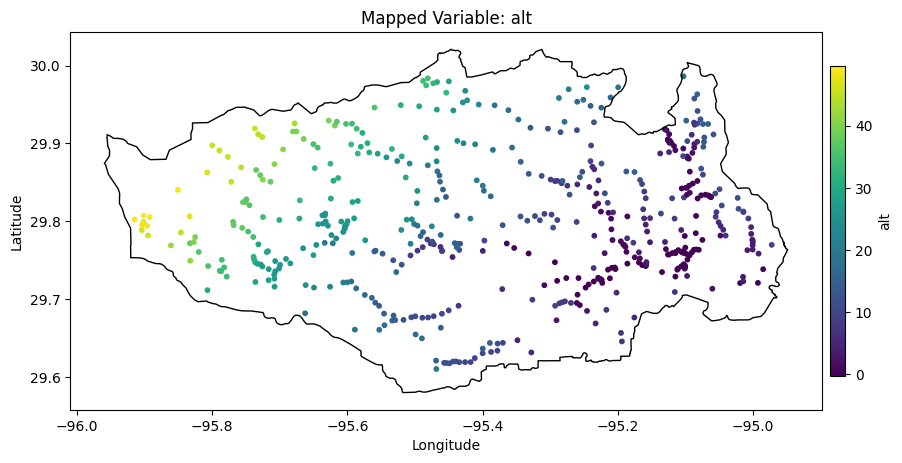

Raster has been saved.


In [25]:
import netCDF4 as nc
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from rasterio.transform import from_origin
from shapely.geometry import box

# Paths to your files
nc_file_path = r'D:/Hesham/CUAHSI/Geospatial/Datasets/Ponding_index/RouteLink_CONUS_v3.0.nc'
shapefile_path = r'D:/Hesham/CUAHSI/Geospatial/Jupyter N/AOI/HUC8_Houston4326.shp'

# Open the NetCDF file and read the alt variable in chunks
ds = nc.Dataset(nc_file_path, 'r')
alt_var = ds.variables['alt']
lon_var = ds.variables['lon']
lat_var = ds.variables['lat']

# Create a GeoDataFrame for the shapefile
shapefile_gdf = gpd.read_file(shapefile_path)

# Ensure the CRS matches
if shapefile_gdf.crs is None:
    shapefile_gdf.set_crs('EPSG:4326', inplace=True)

# Get the bounding box of the shapefile
bounds = shapefile_gdf.total_bounds
minx, miny, maxx, maxy = bounds

# Function to process chunks
def process_chunk(start_idx, end_idx):
    lon_chunk = lon_var[start_idx:end_idx]
    lat_chunk = lat_var[start_idx:end_idx]
    alt_chunk = alt_var[start_idx:end_idx]

    # Create a mask for the bounding box
    lon_mask = (lon_chunk >= minx) & (lon_chunk <= maxx)
    lat_mask = (lat_chunk >= miny) & (lat_chunk <= maxy)
    mask = lon_mask & lat_mask

    lon_clipped = lon_chunk[mask]
    lat_clipped = lat_chunk[mask]
    alt_clipped = alt_chunk[mask]

    return lon_clipped, lat_clipped, alt_clipped

# Process the data in chunks
chunk_size = 10000  # Adjust this size based on available memory
lon_clipped_all = []
lat_clipped_all = []
alt_clipped_all = []

for start_idx in range(0, len(lon_var), chunk_size):
    end_idx = min(start_idx + chunk_size, len(lon_var))
    lon_clipped, lat_clipped, alt_clipped = process_chunk(start_idx, end_idx)
    lon_clipped_all.append(lon_clipped)
    lat_clipped_all.append(lat_clipped)
    alt_clipped_all.append(alt_clipped)

# Combine all chunks
lon_clipped_all = np.concatenate(lon_clipped_all)
lat_clipped_all = np.concatenate(lat_clipped_all)
alt_clipped_all = np.concatenate(alt_clipped_all)

# Create a GeoDataFrame for the clipped data
clipped_gdf = gpd.GeoDataFrame({
    'lon': lon_clipped_all,
    'lat': lat_clipped_all,
    'alt': alt_clipped_all
}, geometry=gpd.points_from_xy(lon_clipped_all, lat_clipped_all))

# Ensure the CRS matches for clipped data
clipped_gdf.set_crs(shapefile_gdf.crs, inplace=True)

# Clip the GeoDataFrame to the shapefile
clipped_gdf = gpd.clip(clipped_gdf, shapefile_gdf)

# Plot the clipped data
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
shapefile_gdf.boundary.plot(ax=ax, linewidth=1, edgecolor='black')
clipped_gdf.plot(column='alt', ax=ax, legend=False, cmap='viridis', markersize=10)

# Add color bar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=clipped_gdf['alt'].min(), vmax=clipped_gdf['alt'].max()))
sm._A = []
cbar = fig.colorbar(sm, ax=ax, fraction=0.02, pad=0.01)  # Adjust fraction and pad as needed
cbar.set_label('alt')

plt.title('Mapped Variable: alt')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Save the clipped data as a raster
# Define the output raster properties
minx, miny, maxx, maxy = shapefile_gdf.total_bounds
ncols, nrows = 1000, 1000  # Adjust the resolution as needed
xres = (maxx - minx) / ncols
yres = (maxy - miny) / nrows
transform = from_origin(minx, maxy, xres, yres)

# Create an empty raster array
raster = np.full((nrows, ncols), np.nan)

# Rasterize the clipped GeoDataFrame
for _, row in clipped_gdf.iterrows():
    px = int((row['geometry'].x - minx) / xres)
    py = int((maxy - row['geometry'].y) / yres)
    if 0 <= px < ncols and 0 <= py < nrows:
        raster[py, px] = row['alt']

# Save the raster to a file
with rasterio.open(
    output_raster_path, 'w',
    driver='GTiff',
    height=nrows, width=ncols,
    count=1, dtype=str(raster.dtype),
    crs=shapefile_gdf.crs,
    transform=transform,
) as dst:
    dst.write(raster, 1)

print("Raster has been saved.")
